# **Multi-Class Logistic Regression Model and 2-layer Multi-Layer Perceptron for MNIST Digit Classification with PyTorch**

Modelling a multi-class logistic regression model with pytorch to predict the digit(0-9) in an image of 28X28 pixels.

Libraries we will use:
* Numpy
* Matplotlib
* Torch
* Torchvision
* tqdm

In [1]:
# importing liberaries
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# importing builtin datasets from torchvision and transforms to transform dataset into tensor.
from torchvision import datasets, transforms


We will download MNIST dataset present in torchvision.datasets

In [2]:
# downloading MNIST dataset's train and train data.
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

0it [00:00, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw


0it [00:00, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw


0it [00:00, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw


0it [00:00, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw
Processing...


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729141890/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Checking number of test and training examples

In [3]:
print("Number of MNIST training examples: {}".format(len(mnist_train)))
print("Number of MNIST test examples: {}".format(len(mnist_test)))

Number of MNIST training examples: 60000
Number of MNIST test examples: 10000


Let's check one example of training set. It contains both input data and corresponding output(label) in form of tuple. Let's extract features:

In [4]:
# checking one example image.
image, label = mnist_train[3]

print("Default Image shape: {}".format(image.shape))

Default Image shape: torch.Size([1, 28, 28])


It is a 3-D tensor(same as a matrix). we will need a 2-D matrix for plotting it as an image through matplotlib.

In [5]:
# reshaping the array into 28 X 28 dimensions as it is a image of 28 X 28 pixels and not 1 X 28 X 28 dimensions.
image = image.reshape([28,28])
print("Reshaped Image shape: {}".format(image.shape))

Reshaped Image shape: torch.Size([28, 28])


Label for this image is: 1


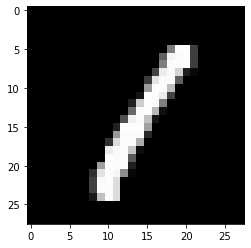

In [6]:
# plotting the image onto graph with grayscale.
plt.imshow(image, cmap="gray")
print("Label for this image is: {}".format(label))

### **Preparing data**

So, let begin modelling.
Let's divide our dataset into batches of batch size of 100.

In [7]:
# loading our MNIST train and test datasets in form of batches with batch_size=100(Simply dividing our data into 100 elements multi-arrays/Tensors).
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [8]:
# choosing one batch to test.
data_train_loader = iter(train_loader)
# extracting input and label of the batch of 100 images.
images, labels = data_train_loader.next()

In [9]:
print("Shape of the minibatch of train loader's images: {}".format(images.shape))
print("Shape of the minibatch of train loader's labels: {}".format(labels.shape))

Shape of the minibatch of train loader's images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of train loader's labels: torch.Size([100])


Reshaping our matrix into 2-D with view in torch module which act just like reshape of numpy.

In [10]:
# reshaping our examples from 2-D to 1-D as we input single dimension array.
x = images.view(-1, 28*28)
print("The shape of input x: {}".format(x.shape))

The shape of input x: torch.Size([100, 784])


Creating parameters of logistic regression model: filter, bias(W, b).

In [11]:
#  creating our model parameters W, b randomly. 784 rows for 784 featuers/pixels of an example/image and 10 colums for 10 classes(0-9).
W = torch.randn(784, 10)/np.sqrt(784)

# Assigning/allowing gradients to these parameters as we will be using stochastic gradient descent on these parameters and will be needing gradient w.r.t these.
W.requires_grad_()
b = torch.zeros(10, requires_grad=True)

Check our input image examples with filter and find correlation betwwen them.

In [12]:
# doing dot product of examples with filters to find amount of correlation between two and adding bias.
y = torch.matmul(x, W) + b

Checking values for first example of correlated matrix.

In [13]:
print(y[0,:])

tensor([ 0.1590,  0.5939,  0.2961,  0.2233, -0.3239, -0.6588, -0.5705,  0.3268,
        -0.1843,  0.6219], grad_fn=<SliceBackward>)


We have both negative and positive values. Normalize it first with the help of exponents such that values of one example sums upto 1. 

In [14]:
# Normalizing or making our correlated values positive by using exponents.
py_eq = torch.exp(y)/torch.sum(torch.exp(y), dim=1, keepdim=True)
print("py[0] from equation: {}".format(py_eq[0]))

py[0] from equation: tensor([0.1023, 0.1580, 0.1173, 0.1090, 0.0631, 0.0451, 0.0493, 0.1209, 0.0725,
        0.1625], grad_fn=<SelectBackward>)


The same can be done with functions in torch.nn.functional. Softmax is used for normalizing values.
\begin{align}
p(y_i) = \text{softmax}(y_i) = \frac{\text{exp}(y_i)}{\sum_j\text{exp}(y_j)}
\end{align}

In [15]:
# Rather then manually writing equation, we can use inbuilt function of torch.nn.functional .
import torch.nn.functional as F

# Using softmax function to normalize our wieghts or correlated values of examples.
py = F.softmax(y, dim=1)
print("py[0] with torch.nn.functional.softmax function: {}".format(py[0]))

py[0] with torch.nn.functional.softmax function: tensor([0.1023, 0.1580, 0.1173, 0.1090, 0.0631, 0.0451, 0.0493, 0.1209, 0.0725,
        0.1625], grad_fn=<SelectBackward>)


### **Optimizing Parameters**

we can optimize paramters with the help of loss function.
\begin{align}
H_{y'}(y)=-\sum_i y'_i \text{log}(y_i)
\end{align}

In [16]:
# calculating loss function for optimizing manually by writing loss function i.e. adding our predicted value(correlated values of true labels).
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print("cross entropy from equation: {}".format(cross_entropy_eq))

cross entropy from equation: 2.3201467990875244


In [17]:
# Using inbuilt function of torch to calculate cross entropy.
cross_entropy = F.cross_entropy(y, labels)
print("cross entropy from torch.nn.functional.cross_entropy function: {}".format(cross_entropy))

cross entropy from torch.nn.functional.cross_entropy function: 2.3201467990875244


In [18]:
# optimizing paramteres with step size 0.1 and Stochastic Gradient Descent.
optimizer = torch.optim.SGD([W,b], lr=0.1)

# calculating gradients of allowed parameters w.r.t optimizing condition i.e. loss function.
cross_entropy.backward()

In [19]:
# gradient before optimizing.
b.grad

tensor([ 0.0036,  0.0157,  0.0121,  0.0614, -0.0374,  0.0016, -0.0079, -0.0652,
        -0.0515,  0.0677])

In [20]:
# optimzing with step size 0.1
optimizer.step()

# gradient w.r.t b after optimizing
print(b)

tensor([-0.0004, -0.0016, -0.0012, -0.0061,  0.0037, -0.0002,  0.0008,  0.0065,
         0.0052, -0.0068], requires_grad=True)


Perform the same thing for all batches. Gradients don't update ut accumulate with every optimization step. Zero out gradients before next optimization step.

In [21]:
print("b.grad before zero_grad:{}".format(b.grad))

b.grad before zero_grad:tensor([ 0.0036,  0.0157,  0.0121,  0.0614, -0.0374,  0.0016, -0.0079, -0.0652,
        -0.0515,  0.0677])


In [22]:
# Gradients doesn't update but accumulate with every optimizing step. So, have to zero out before updating gradients.
optimizer.zero_grad()
print("b.grad after zero_grad:{}".format(b.grad))

b.grad after zero_grad:tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [23]:
# Filter matrix
print(W)

tensor([[ 0.0057, -0.0263, -0.0168,  ..., -0.0116,  0.0285, -0.0043],
        [ 0.0037,  0.0154,  0.0040,  ...,  0.0483,  0.0025, -0.0165],
        [ 0.0369,  0.0079,  0.0185,  ..., -0.0312,  0.0151,  0.0270],
        ...,
        [-0.0141, -0.0095, -0.0062,  ..., -0.0404, -0.0049, -0.0552],
        [ 0.0551, -0.0303,  0.0276,  ...,  0.0277,  0.0150,  0.0091],
        [ 0.0435, -0.0116, -0.0074,  ..., -0.0461,  0.0102, -0.0103]],
       requires_grad=True)


Performing optimization for all batches

In [24]:
# Doing the same thing for all test batches.
for images, labels in tqdm(train_loader):
    # zero out the gradients.
    optimizer.zero_grad()

    # preapring data.
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    
    cross_entropy = F.cross_entropy(y, labels)
    cross_entropy.backward()
    optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

In [25]:
#  Models's learned parameters
print("Filter:{}".format(W))
print("Bias:{}".format(b))

Filter:tensor([[ 0.0057, -0.0263, -0.0168,  ..., -0.0116,  0.0285, -0.0043],
        [ 0.0037,  0.0154,  0.0040,  ...,  0.0483,  0.0025, -0.0165],
        [ 0.0369,  0.0079,  0.0185,  ..., -0.0312,  0.0151,  0.0270],
        ...,
        [-0.0141, -0.0095, -0.0062,  ..., -0.0404, -0.0049, -0.0552],
        [ 0.0551, -0.0303,  0.0276,  ...,  0.0277,  0.0150,  0.0091],
        [ 0.0435, -0.0116, -0.0074,  ..., -0.0461,  0.0102, -0.0103]],
       requires_grad=True)
Bias:tensor([-0.1135,  0.2025, -0.0317, -0.0963,  0.0622,  0.2932, -0.0185,  0.1668,
        -0.4089, -0.0556], requires_grad=True)


Torch.nn module already has all the function that we need for logistic function. We can train our data with the help of those functions too.

In [26]:
lin = torch.nn.Linear(784, 10)
optimizer = torch.optim.SGD(lin.parameters(), lr=0.1)
for images, labels in tqdm(train_loader):
    y = lin(images.view(-1, 784))
    optimizer.zero_grad()
    cross_entropy = F.cross_entropy(y, labels)
    cross_entropy.backward()
    optimizer.step()
print("Filter: {}".format(list(lin.parameters())[0]))
print("Bias: {}".format(list(lin.parameters())[1]))

  0%|          | 0/600 [00:00<?, ?it/s]

Filter: Parameter containing:
tensor([[-0.0292, -0.0315,  0.0184,  ..., -0.0033, -0.0127, -0.0071],
        [ 0.0100,  0.0336, -0.0309,  ..., -0.0047,  0.0224, -0.0337],
        [-0.0316,  0.0003,  0.0309,  ...,  0.0064, -0.0287, -0.0271],
        ...,
        [-0.0257,  0.0200,  0.0081,  ..., -0.0112,  0.0345,  0.0081],
        [ 0.0123,  0.0166,  0.0166,  ...,  0.0221, -0.0277,  0.0227],
        [-0.0014,  0.0120, -0.0350,  ..., -0.0235, -0.0086, -0.0026]],
       requires_grad=True)
Bias: Parameter containing:
tensor([-0.1012,  0.1835, -0.0398, -0.1028,  0.0347,  0.3104, -0.0036,  0.1952,
        -0.4162, -0.0663], requires_grad=True)


Note, Both have different learned parameters. That's because initially we randomly created model's filters. It will produce different results every time we run our model.

**TESTING PERFORMANCE**

Test our model with test set. 

In [27]:
# No. of correct values assigned to 0.
correct = 0
total = len(mnist_test)

In [28]:
# Don't have to calculate gradient now. just have to check correct predictions. But as parameters were created with allowd gradient calculation have to cancel that.
with torch.no_grad():
    # iterating on test batches.
    for images, labels in tqdm(test_loader):
        # preparing data and calcuting correlated values.
        x = images.view(-1, 784)
        y = torch.matmul(x, W) + b

        # Our model prediction is the max correlated value of the given ten classes values.
        predictions = torch.argmax(y, dim =1)

        # Checking correct values.
        correct += torch.sum((predictions == labels).float())

  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy: correcttly predicted values/ total values

In [29]:
#  Test Accuracy
print('Test Accuracy: {}'.format(correct/total))
print('Test correct: {} of {}'.format(correct, total))

Test Accuracy: 0.902999997138977
Test correct: 9030.0 of 10000


Check our filters by plotting them on graphs

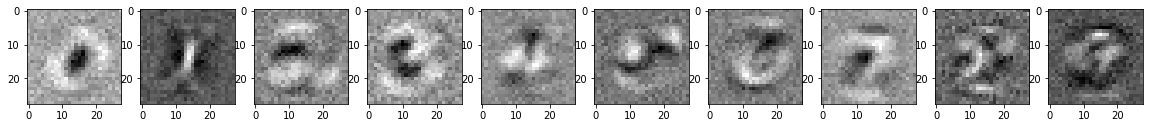

In [30]:
# Plotting learned filters.
fig, ax = plt.subplots(1, 10, figsize=(20,2))
for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28,28), cmap='gray')

I have modeled a simple multi-class logistic regression model, which is a one-layer neural network, projecting straight from input to output predictions. 

Now, I will transform it into a multi-layer perceptron, having multiple successive fully-connected layers with object oriented higher level APIs. For this case, I will just add one hidden layer. So, it will be a 2-layer MLP for MNIST digit Classification.

# **2-Multi-Layer Perceptron for MNIST digit classification**

Importing functional from torch.nn for using functions insted of equations.


In [31]:
import torch.nn as nn
import torch.nn.functional as F


Making a class for our logistic regression model so that we won't have to write it multiple times.

In [32]:
class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784,10)
    def forward(self,x):
        return self.lin(x)

Choosing the size of hidden layer

In [33]:
#size of hidden layer 
shiddenlayer = 100

Downloading data for our model

In [34]:
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)


Storing all of the models and paramteres in one list, which will make it easier to pass in the SGD function.

In [35]:
models = []
parameters = []
for i in range(shiddenlayer):
    models.append(MNIST_Logistic_Regression())
    parameters.append(list(models[i].parameters())[0])
    parameters.append(list(models[i].parameters())[1])


Writing out the loss function and training our dataset on the multiple batches with intermediate layer having non-linear relationship because of ReLU.

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(parameters, lr=0.1)
for images, labels in tqdm(train_loader):
    optimizer.zero_grad()
    hiddenfeatures = torch.zeros(shiddenlayer, 100, 10)
    x = images.view(-1, 784)
    for modelno in range(shiddenlayer):
        y = models[modelno](x)
        hiddenfeatures[modelno] += F.relu(y)
    modelsum = torch.sum(hiddenfeatures, 0, keepdim=False)
    loss = criterion(modelsum, labels)
    loss.backward()
    optimizer.step()
        

  0%|          | 0/600 [00:00<?, ?it/s]

Testing our model and checking its accuracy if it has increased from before or not.

In [37]:
# Testing
correct = 0
total = len(mnist_test)
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1, 784)
        hiddenfeatures = torch.zeros(shiddenlayer, 100, 10)
        for modelno in range(shiddenlayer):
            y = models[modelno](x)
            hiddenfeatures[modelno] += F.relu(y)
        modelsum = torch.sum(hiddenfeatures, 0, keepdim=False)
        prediction = torch.argmax(modelsum, dim=1)
        correct += torch.sum((prediction == labels).float())
            

  0%|          | 0/100 [00:00<?, ?it/s]

In [38]:
print("Test Accuracy:{}%\n".format(correct/total*100))

Test Accuracy:93.94000244140625%

